In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
df = pd.read_csv('./tmy3_by_date.csv')
df['Date (MM/DD/YYYY)'] = pd.to_datetime(df['Date (MM/DD/YYYY)'])

In [4]:
df.head()

,Date (MM/DD/YYYY),ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,DNI uncert (%),DHI (W/m^2),...,CeilHgt (m),CeilHgt uncert (code),Pwat (cm),Pwat uncert (code),AOD (unitless),AOD uncert (code),Alb (unitless),Alb uncert (code),Lprecip uncert (code),station_number
0,1976-01-01,147.941092,533.433908,73.294540,1.0,4.889368,118.333333,1.0,4.475575,34.340517,...,43010.571839,7.307471,0.857184,8.0,-4821.949282,4.103448,-9900.0,0.0,0.0,724568.379310
1,1977-01-01,179.604167,564.520833,88.541667,1.0,5.333333,126.625000,1.0,4.166667,43.270833,...,49402.083333,7.000000,1.008333,8.0,-2887.440042,5.666667,-9900.0,0.0,0.0,724235.000000
2,1978-01-01,91.250000,428.895833,28.583333,1.0,3.833333,6.500000,1.0,3.500000,27.812500,...,19631.187500,7.729167,0.612500,8.0,-6599.984875,2.666667,-9900.0,0.0,0.0,713390.000000
3,1979-01-01,121.883333,461.650000,47.925000,1.0,3.891667,39.683333,1.0,3.158333,31.966667,...,22579.566667,7.266667,1.469167,8.0,-4124.961042,4.666667,-9900.0,0.0,0.0,714974.000000
4,1980-01-01,149.567130,536.733796,64.222222,1.0,5.050926,65.937500,1.0,4.627315,39.715278,...,24914.585648,7.481481,0.943287,8.0,-5087.472831,3.888889,-9900.0,0.0,0.0,736955.888889


# Average values by year (very flat)

In [38]:
yeardf = df.groupby(by= lambda x: df['Date (MM/DD/YYYY)'][x].year).mean().reset_index()

In [39]:
yeardf.head()

,index,ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,DNI uncert (%),DHI (W/m^2),...,CeilHgt (m),CeilHgt uncert (code),Pwat (cm),Pwat uncert (code),AOD (unitless),AOD uncert (code),Alb (unitless),Alb uncert (code),Lprecip uncert (code),station_number
0,1976,309.060175,696.487208,168.623851,1.0,6.536484,180.719790,1.0,6.197066,66.917982,...,44710.615385,7.516381,1.343933,8.0,-3490.229072,5.179572,-9900.0,0.0,0.0,726837.635761
1,1977,327.070907,691.377208,175.210916,1.0,6.403823,176.228110,1.0,5.977923,73.884893,...,44475.509888,7.346656,1.810278,8.0,-3222.753447,5.395702,-9900.0,0.0,0.0,738459.480352
2,1978,317.673274,680.184006,171.002142,1.0,6.227741,172.791316,1.0,5.842947,69.871479,...,45146.184726,7.406516,1.752414,8.0,-3677.563168,5.028177,-9900.0,0.0,0.0,721527.738316
3,1979,333.662505,692.130790,180.436752,1.0,6.163307,184.946883,1.0,5.702877,72.495907,...,46001.336879,7.347493,1.719071,8.0,-3343.841559,5.297851,-9900.0,0.0,0.0,723994.872368
4,1980,325.257291,689.876003,176.518837,1.0,6.263358,180.865890,1.0,5.783516,70.964451,...,44765.491220,7.456021,1.573235,8.0,-3569.073404,5.115852,-9900.0,0.0,0.0,725128.817983


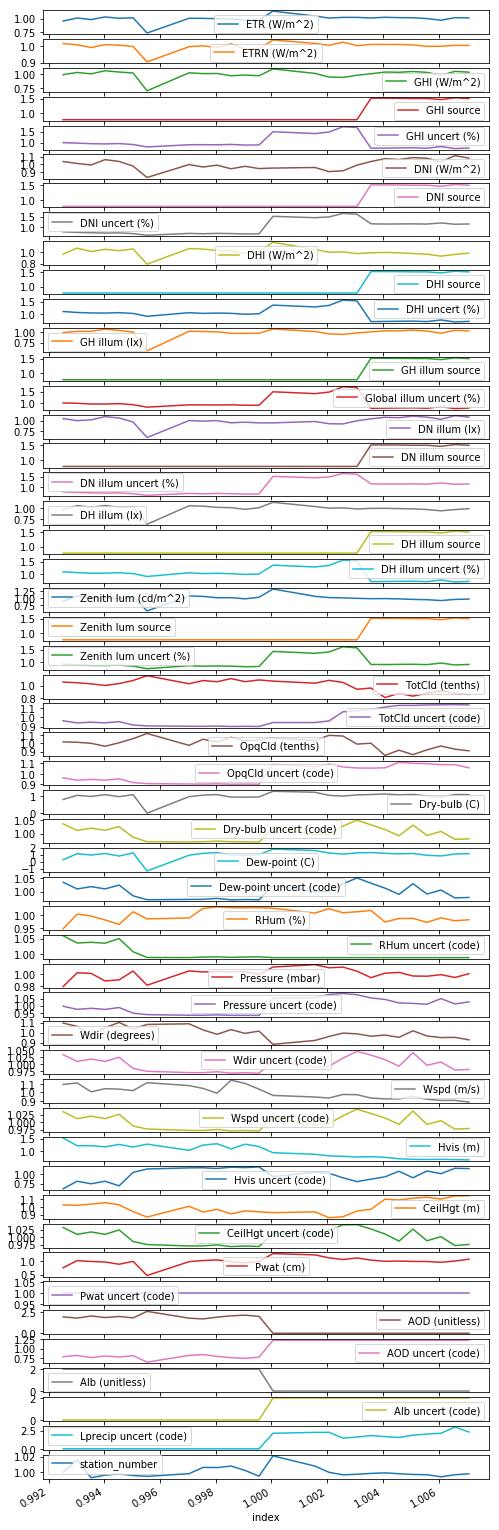

In [57]:
_ = yeardf.apply(lambda x: x / x.mean()).plot(x = 'index', subplots = True, figsize=(8, 30))

# Feature distributions 

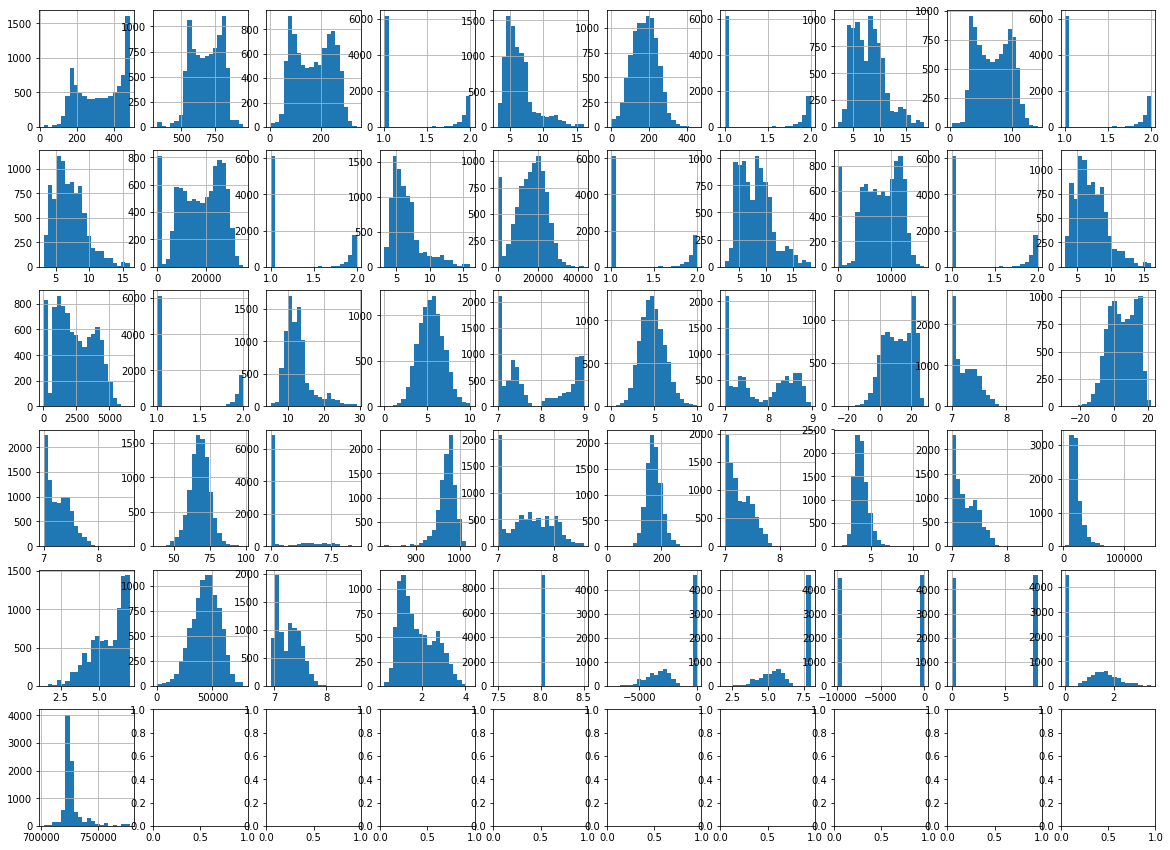

In [68]:
fig, ax = plt.subplots(6, 10, figsize = (20, 15))
ax = ax.flatten()
for i, col in enumerate(df.columns[1:]):
    df[col].hist(bins = 20, ax = ax[i])


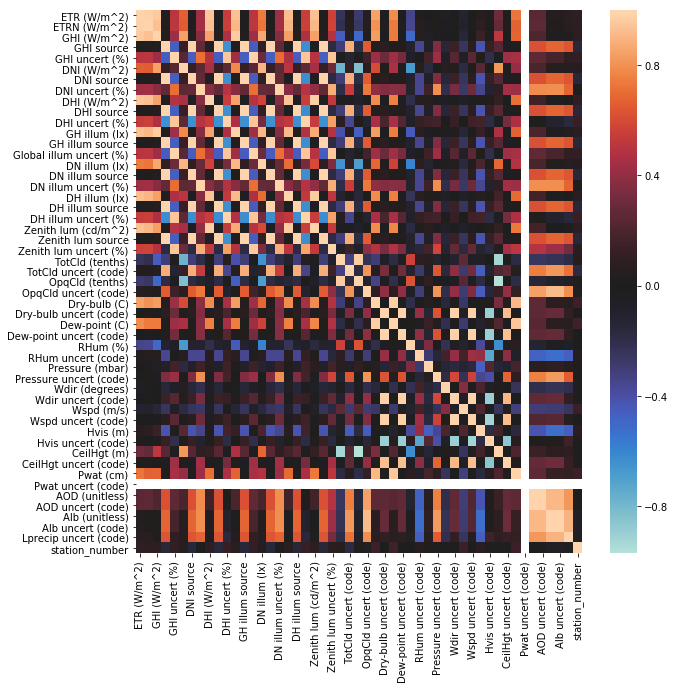

In [69]:
corr = df.iloc[:,1:].corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr, center = 0 )

## Avg values by year

In [5]:
df.head()

,Date (MM/DD/YYYY),ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,DNI uncert (%),DHI (W/m^2),...,CeilHgt (m),CeilHgt uncert (code),Pwat (cm),Pwat uncert (code),AOD (unitless),AOD uncert (code),Alb (unitless),Alb uncert (code),Lprecip uncert (code),station_number
0,1976-01-01,147.941092,533.433908,73.294540,1.0,4.889368,118.333333,1.0,4.475575,34.340517,...,43010.571839,7.307471,0.857184,8.0,-4821.949282,4.103448,-9900.0,0.0,0.0,724568.379310
1,1977-01-01,179.604167,564.520833,88.541667,1.0,5.333333,126.625000,1.0,4.166667,43.270833,...,49402.083333,7.000000,1.008333,8.0,-2887.440042,5.666667,-9900.0,0.0,0.0,724235.000000
2,1978-01-01,91.250000,428.895833,28.583333,1.0,3.833333,6.500000,1.0,3.500000,27.812500,...,19631.187500,7.729167,0.612500,8.0,-6599.984875,2.666667,-9900.0,0.0,0.0,713390.000000
3,1979-01-01,121.883333,461.650000,47.925000,1.0,3.891667,39.683333,1.0,3.158333,31.966667,...,22579.566667,7.266667,1.469167,8.0,-4124.961042,4.666667,-9900.0,0.0,0.0,714974.000000
4,1980-01-01,149.567130,536.733796,64.222222,1.0,5.050926,65.937500,1.0,4.627315,39.715278,...,24914.585648,7.481481,0.943287,8.0,-5087.472831,3.888889,-9900.0,0.0,0.0,736955.888889


In [ ]:
df['Date (MM/DD/YYYY)']